# Computer Vision - P3

## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in **English**. 

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in **English**.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently. 

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.

**Deadline (Campus Virtual): Group A & F: November 14th, 23:00 h; Group B: November 14th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



In [1]:
# Example
import numpy as np
import skimage
from skimage import io, img_as_float, color, feature
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.exposure import histogram
from skimage.segmentation import felzenszwalb, mark_boundaries, slic, quickshift
from skimage.transform import resize
from skimage.color import rgb2gray, rgba2rgb
from skimage.util import random_noise


Matplotlib created a temporary config/cache directory at /var/folders/lz/zmsq9h_175198zgg4k68k8th0000gn/T/matplotlib-972x26wy because the default path (/Users/pedro/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#Print the list of images in a figure with out axis
def viewFigure(images, titles):

    figure, x = plt.subplots(1, len(images))
    figure.set_size_inches(15,15)

    #For each image
    for i in range(len(images)):

        x[i].imshow(images[i])#Set the image
        x[i].set_title(titles[i])#Set the title
        x[i].axis('off')#Set the axis off

    #Show all the images
    plt.show()
    
#Print the list of images in a figure with out axis
def viewFigureGray(images, titles):

    figure, x = plt.subplots(1, len(images))
    figure.set_size_inches(15,15)

    #For each image
    for i in range(len(images)):

        x[i].imshow(images[i], 'gray')#Set the image
        x[i].set_title(titles[i])#Set the title
        x[i].axis('off')#Set the axis off

    #Show all the images
    plt.show()

## 3.1 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images_notebook/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'barcelona.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.

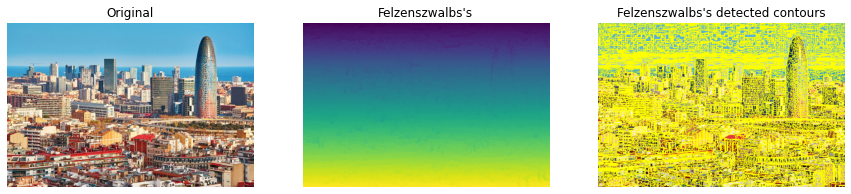

In [3]:
barcelona = io.imread('images_notebook/barcelona.jpeg')#Read the image
barcelonaFelzenszwalbs = felzenszwalb(barcelona)  #Felzenszwalbs's method
barcelonaFelzenszwalbsContours = mark_boundaries(barcelona, barcelonaFelzenszwalbs)  #The mark_boundaries is to detected contours

images = [barcelona, barcelonaFelzenszwalbs, barcelonaFelzenszwalbsContours]
titles = ["Original", "Felzenszwalbs's", "Felzenszwalbs's detected contours"]
viewFigure(images, titles)

Result: We can see that when we apply just the Felzenswalbs we don't see anything, but when we mix the images using mark_boundaries we can see that there are lines in all the edges of the image. Maybe we would use less tolerance to edges because this detects edges on the skye or the sea.

b) Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


Answer the following questions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
We have tryed and we observed that in grayscale images the algorism find less edges in parts like skye
- Is it critical to convert the image in float in order to do the image segmentation?
We don't found big differences between the normal image and the float one
- Which are the optimal values according to your subjective perception?
We think that the better values are scale = 100, sigma = 1 and min_size 100 
- How does each parameter behave?
Bigger scale means less edges, less sigma means that it will takes lower changing edges and the min_size is the min_size of the edges.
- Does the image reduction affect the optimal values? 
When we reduce the image we can see that the algorsim is liker more noisy and detects a lot of edges in the skye.

In [4]:
def felzenszwalbsParam(image, scale, sigma, minSize):
    images = []
    titles = []
    resizeImage = resize(image, (image.shape[0]/3, image.shape[1]/3), anti_aliasing=True)
    for i in range (0,3):
        felzenszwalbs = felzenszwalb(resizeImage, scale =scale[i] , sigma = sigma[i], min_size = minSize[i])
        num_segments = len(np.unique(felzenszwalbs))
        felzenszwalbs = mark_boundaries(resizeImage,felzenszwalbs)
        
        images.append(felzenszwalbs)
        titles.append(scale[i])
        print("Number of segments image ", i+1, ": ", num_segments)
        
    viewFigure(images, titles)

In [5]:
felzenszwalbsParam(barcelona, [25, 100 , 250], [0.5, 1, 1.5 ], [50, 100, 150])

ValueError: Integer argument required but received (222.33333333333334, 333.3333333333333, 3), check inputs.

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

El algoritmo de Felzenszwalb es utilizado para la segmentación de imágenes basada en la detección de bordes y regiones. Sus ventajas incluyen la capacidad para manejar variaciones en tamaño y forma de los objetos, pero puede ser computacionalmente costoso en imágenes grandes y sensibles a parámetros.

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

In [ ]:
barcelonaSegmentsSlic = slic(barcelona)#SLIC's
barcelonaSegmentsSlicMark = mark_boundaries(barcelona, barcelonaSegmentsSlic)  #Mark_boundaries to contours

images = [barcelona, barcelonaSegmentsSlic, barcelonaSegmentsSlicMark]
titles = ["Original", "SLIC", "SLIC contour"]
viewFigure(images, titles)

Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


In [ ]:
def slicParam(image, n_segments, compactness, sigma):
    images = []
    titles = []
    resizeImage = resize(image, (image.shape[0], image.shape[1]), anti_aliasing=True)

    for i in range (0,3):
        segmentsSlic = slic(barcelona, n_segments=n_segments[i], compactness=compactness[i], sigma=sigma[i]) 
        num_segments = len(np.unique(segmentsSlic))
        segmentsSlic = mark_boundaries(barcelona,segmentsSlic)
        images.append(segmentsSlic)
        titles.append(n_segments[i])
        print("Number of segments image ", i+1, ": ", num_segments)
        
    
    viewFigure(images, titles)

In [ ]:
slicParam(barcelona, [100, 500 , 1000], [1, 10, 20], [2.5, 10, 20])

f) Comment what the algorithm is (in up to 3 lines).

SLIC (Simple Linear Iterative Clustering) is an image segmentation algorithm that groups similar pixels into compact regions. Its advantages include computational efficiency and control over the number of segments, but it can have difficulties with irregularly shaped objects and homogeneous textures.

### Quickshift image segmentation

g) Segment the original image using the Quickshift algorithm. 

Create a loop where you explore kernel_size variations in order to obtain a better image segmentation. Argument why a higher or lower value improves the segmentation results. 


In [ ]:
barcelonaSegmentsQuick = quickshift(barcelona) #Quickshift's 
barcelonaSegmentsQuickMark = mark_boundaries(barcelona, barcelonaSegmentsQuick)#Mark_boundaries to contours

images = [barcelona, barcelonaSegmentsQuick, barcelonaSegmentsQuickMark]
titles = ["Original", "Quickshift", "Quickshift contour"]
viewFigure(images, titles)

In [ ]:
def quickshiftParam(image):
    images = []
    titles = []
    
    #We have reduced the image because it's faster, just change the "resizeImage" for "image" if you want to execute with no resized imaged.
    resizeImage = resize(image, (image.shape[0]/3, image.shape[1]/3), anti_aliasing=True)

    for kernel_size in range(5, 20, 5):
        imageQuick = quickshift(resizeImage, kernel_size=kernel_size)
        imageSegmentsQuickMark = mark_boundaries(resizeImage,imageQuick)

        images.append(imageSegmentsQuickMark)
        titles.append(f"Kernel Size: {kernel_size}")

    viewFigure(images, titles)

In [ ]:
barcelona = io.imread('images_notebook/barcelona.jpeg')#Read the image
quickshiftParam(barcelona)

Argument why a higher or lower value improves the segmentation results:
Reducing kernel size yields smaller, detailed segments, beneficial for fine region or detail segmentation. Conversely, increasing kernel size produces larger segments, aiding in grouping broader image regions, useful for capturing larger and smoother structures.

h) Comment what the algorithm is (in up to 3 lines).

Quickshift is a segmentation algorithm that uses pixel densities and color distance to form regions. Its advantages include adaptability to various shapes and sizes of regions, but it can cause oversegmentation in homogeneous areas and is sensitive to the sensitivity of its parameters.

### Comparison of segmentation algorithms

Apply the best set of parameters of each algorithm and apply it to: 
1) Original image
1) Salt and pepper noise version of this image
2) Flipped image (horizontally)
3) Canny edge detector result of this image. 

Plot the image and its results of fezenswalb and SLIC algorithm in a 1x3 subplots. 

In [ ]:
def compareAlgorisms(image):
    images = []
    titles = []
    # Apply segmentation algorithms to different versions of the image
    # Original image
    seg_felzenszwalb = felzenszwalb(image, scale=100, sigma=1, min_size=100)
    felzenszwalb_marked = mark_boundaries(image,seg_felzenszwalb)
    seg_slic = slic(image, n_segments=500, compactness=10)
    slic_marked = mark_boundaries(image,seg_slic)
    seg_quickshift = quickshift(image, kernel_size=9)
    quickshift_marked = mark_boundaries(image,seg_quickshift)
    
    images.append(felzenszwalb_marked)
    images.append(slic_marked)
    images.append(quickshift_marked)
    titles.append("Felzenszwalb segmentation")
    titles.append("Slic segmentation")
    titles.append("Quickshift segmentation")
    
    viewFigure(images, titles)
    
    images = []
    titles = []
    
    # Salt and pepper noise version
    image_with_noise = random_noise(image, mode='s&p', amount=0.05)
    seg_felzenszwalb_noise = felzenszwalb(image_with_noise, scale=100, sigma=1, min_size=100)
    felzenszwalb_noise_marked = mark_boundaries(image_with_noise,seg_felzenszwalb_noise)
    seg_slic_noise = slic(image_with_noise, n_segments=500, compactness=10)
    slic_noise_marked = mark_boundaries(image_with_noise,seg_slic_noise)
    seg_quickshift_noise = quickshift(image_with_noise, kernel_size=9)
    quickshift_noise_marked = mark_boundaries(image_with_noise,seg_quickshift_noise)

    images.append(felzenszwalb_noise_marked)
    images.append(slic_noise_marked)
    images.append(quickshift_noise_marked)
    titles.append("Felzenszwalb noise segmentation")
    titles.append("Slic noise segmentation")
    titles.append("Quickshift noise segmentation")
    
    viewFigure(images, titles)
    
    images = []
    titles = []

    # Flipped image
    flipped_image = np.fliplr(image)
    seg_felzenszwalb_flipped = felzenszwalb(flipped_image, scale=100, sigma=1, min_size=100)
    felzenszwalb_flipped_marked = mark_boundaries(flipped_image,seg_felzenszwalb_flipped)
    seg_slic_flipped = slic(flipped_image, n_segments=500, compactness=10)
    slic_flipped_marked = mark_boundaries(flipped_image,seg_slic_flipped)
    seg_quishift_flipped = quickshift(flipped_image, kernel_size=9)
    quickshift_flipped_marked = mark_boundaries(flipped_image,seg_quishift_flipped)

    images.append(felzenszwalb_flipped_marked)
    images.append(slic_flipped_marked)
    images.append(quickshift_flipped_marked)
    titles.append("Felzenszwalb flipped segmentation")
    titles.append("Slic fliped segmentation")
    titles.append("Quickshift flipped segmentation")
    
    viewFigure(images, titles)
    
    images = []
    titles = []
    
    # Canny edge detector result
    edges = feature.canny(rgb2gray(image), sigma=2.5)

    # Convert the grayscale image to multichannel (3 channels) for slic
    edges_multichannel = np.stack((edges, edges, edges), axis=-1)

    seg_felzenszwalb_edges = felzenszwalb(edges, scale=100, sigma=1, min_size=100)
    felzenszwalb_canny_marked = mark_boundaries(edges, seg_felzenszwalb_edges)

    # Use the multichannel image for slic
    seg_slic_edges = slic(edges_multichannel, n_segments=500, compactness=10)
    slic_canny_marked = mark_boundaries(edges_multichannel, seg_slic_edges)

    seg_quickshift_edges = quickshift(edges_multichannel, kernel_size=9)
    quickshift_canny_marked = mark_boundaries(edges, seg_quickshift_edges)
    
    images.append(felzenszwalb_canny_marked)
    images.append(slic_canny_marked)
    images.append(quickshift_canny_marked)
    titles.append("Felzenszwalb canny segmentation")
    titles.append("Slic canny segmentation")
    titles.append("Quickshift canny segmentation")
    
    viewFigure(images, titles)

In [ ]:
compareAlgorisms(barcelona)

- Do the transformations affect the segmentation? Why or why not? 
Yes, they affect, we can see for example the noise effect cause the skye look diferent for the algorisms felzenszwalb and quicksift, therefore the slic one don't show many differences. In the flipped image, obviously the algorism found the things equal but starting by the otherside, and for finish, the canny image...


- Can the number of segments can be used as a criterion for the performance of the algorithms?
We think that yes, if we have a number of segments to small it will be difficult to recognize things with the segments, by the other side, if we have a lot of segments it would say to us that the algorism is to much accurate so it gives to much detail that is not important for recognizing objects.

## 3.2 Segmentation via clustering

In this exercise, you will implement hierarchical clustering to segment the "images_notebook/loro.png" image in gray scales. First load and visualize the image, then implement hierarchical clustering over the pixels and plot the final results side by side to the original image

Hint: Sklearn has a hierarchical clustering implementation you should use. Reshape your dataset such that you have a 2 dimensional array. Use linkage "ward" and grid_to_graph function for the connectivity parameter. 

<img src="images_notebook/loro_segmentation.jpg" width=600>

In [ ]:
from sklearn.feature_extraction import image
from sklearn.cluster import AgglomerativeClustering

# Load the image
image_path = "images_notebook/loro.png"
image_data = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image_data)

# Reshape the dataset to have a 2-dimensional array
flattened_image = np.reshape(gray_image, (-1, 1))

# Create connectivity for clustering
connectivity_matrix = image.grid_to_graph(*gray_image.shape)

# Number of clusters determines the number of marked contours (n_clusters = 10 in this case)
num_clusters = 10

# Implement hierarchical clustering using the AgglomerativeClustering function
clustering_model = AgglomerativeClustering(
    n_clusters=num_clusters,
    linkage='ward',
    connectivity=connectivity_matrix
).fit(flattened_image)

# Define labels for the clustering result
cluster_labels = np.reshape(clustering_model.labels_, gray_image.shape)

# Plot the result
plt.figure(figsize=(5, 5))
plt.imshow(gray_image, cmap=plt.cm.gray)

for current_label in range(num_clusters):
    contour_colors = [plt.cm.viridis(current_label / num_clusters), ]
    current_contour = cluster_labels == current_label
    plt.contour(current_contour, contours=1, colors=contour_colors)

plt.xticks(())
plt.yticks(())
plt.show()

## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images_notebook/screenshot.png" width=600>

## 3.3 Segmentation of video shots

Read and visualize the sequence of images "images_notebook/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [ ]:
%matplotlib nbagg  

ic = io.ImageCollection('images_notebook/Barcelona-sequence/*.png')

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def run(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, run, interval=1, blit=True, frames=len(ic), repeat= False)
plt.show()

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images_notebook/histogramshot.png" width=600>
<img src="images_notebook/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

The plot above was obtain by using 64 bins histogram and the measure as mean of absolute difference. 

In [ ]:
# Generation of sinusoidal plot points
def data_gen():
    y = 0  ## Value of interest
    t = data_gen.t  ## Temporal value
    contador = 0 #Make a count
    while contador < 1000:
        t += 0.05
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        contador+=1
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# Make a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(2,1)

#Start a line object for charting on the second axes.
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

 
xdata, ydata = [], []

def run(data):
    # Refresh the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    ymin, ymax = ax2.get_ylim()
    
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
    
    if y >= ymax:
        ax2.set_ylim(ymin,2*ymax)
        ax2.figure.canvas.draw()
            
    # Refresh the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [ ]:
# Your solution here
%matplotlib nbagg 

ic_float = skimage.img_as_float(ic)

# Constant production of plot points
def data_gen():    
    t = data_gen.t
    cnt = 0    
    while cnt < 1000:
        mean = 0  
        #We determine the current frame's histogram's value.
        h1 = [histogram(ic_float[cnt][:, :, i], 4)[0] for i in range(3)]
        #We determine the histogram's value for the ensuing frame.
        h2 = [histogram(ic_float[cnt+1][:, :, i], 4)[0] for i in range(3)]
        #The difference between the frames is what we acquire.
        difference = [abs(h1[i] - h2[i]) for i in range(3)]
        #The mean of this difference is what we get.
        mean = np.mean(difference)      
        cnt += 1
        t += 0.05
        y = mean
        
        yield t, y
        
data_gen.t = 0

# Make a figure with two subplots.
fig, (ax1, ax2) = plt.subplots(2,1)

#Start a line object for charting on the second axes.
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1000.1)
ax2.set_xlim(0, 5)
ax2.grid()



xdata, ydata = [], []

def run(data):
    #Refresh the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    #Refresh the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

c) Show the initial and final images of each shot extracted as follows:

<img src="images_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot as shown in the reference image


In [ ]:
%matplotlib inline
%matplotlib notebook

changingFrames = [0]
def getFrames():
    listFrames =[ic_float[0]]   #We add the first frame
    for cnt in range(len(ic_float)-1):  #iterate the frames
        mean = 0
        histogram1 = [histogram(ic_float[cnt][:, :, i], 4)[0] for i in range(3)] #value of the histogram of the current frame   
        histogram2 = [histogram(ic_float[cnt+1][:, :, i], 4)[0] for i in range(3)]  #value of the histogram of the next frame
        difference = [abs(histogram1[i] - histogram2[i]) for i in range(3)] #difference between the frames
        mean = np.mean(difference)#mean of this difference
        
        if(mean > 15000):    #a value of 15000 implies a change of scene
            listFrames.append(ic_float[cnt])   #We add the frame
            listFrames.append(ic_float[cnt+1])  #We add the frame
            changingFrames.append(cnt)
            changingFrames.append(cnt+1)

            
    listFrames.append(ic_float[cnt+1])
    changingFrames.append(len(ic_float)-1)
    return listFrames

In [ ]:
frames = getFrames()
fig = plt.figure(figsize=(10,15)) 

for i in range(len(frames)):
    plt.subplot(4, 2,1+i)
    
    if(i%2==0):
        title="Initial"
    else:
        title="Final"
    
    plt.title(title)
    plt.imshow(frames[i])
    plt.axis(False)

d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

We compare the average of the three-channel difference between two continuous scenes to distinguish between them. A change has probably occurred in the scene if there is a large difference (in this case, we calculate a value of 15000).

e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

The provided video segmentation strategy, based on computing the mean of the absolute difference between histograms of consecutive frames, is not suitable for separating and tracking objects. This technique focuses on detecting general changes in scene content, but does not offer the ability to segment and track specific objects due to its global focus and limited spatial information. For object segmentation and tracking, more sophisticated approaches are required, such as computer vision algorithms or deep learning-based methods designed for object detection and tracking in a video.

f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

The video segmentation strategy based on the mean of the absolute difference between histograms of consecutive frames might struggle to capture continuous transitions effectively. This is due to its focus on global changes and its limited sensitivity to detect subtle or continuous variations within a shot. To capture continuous transitions, advanced video segmentation techniques such as optical flow analysis, motion detection, or algorithms based on machine learning models would be more appropriate.

## 3.4 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images_notebook/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [ ]:
def positions():
    positions = [0]  #first frame on the list
    for cnt in range(len(ic_float)-1):  #Iterate the frames
        mean = 0
        histogram1 = [histogram(ic_float[cnt][:, :, i], 4)[0] for i in range(3)]#Value of the histogram of the actual frame
        histogram2 = [histogram(ic_float[cnt+1][:, :, i], 4)[0] for i in range(3)]#Value of the histogram of the next frame
        difference = [abs(histogram1[i] - histogram2[i]) for i in range(3)]#Difference between the frames
        mean = np.mean(difference)#Mean of this difference
        
        if(mean > 15000):   #We determine that in case of exceeding the average, a value of 15000 implies a change of scene
            positions.append(cnt)      #We add the frame to the list  --> position
            positions.append(cnt+1)    #We add the frame to the list  --> position
            
    positions.append(cnt+1)  #Last frame on the list
    return positions

In [ ]:
def bg_fg(position1,position2):        
    bg = np.zeros(ic[0].shape)  #Background with the same dimension
    
    redChanel = [] #Red chanel values
    greenChanel = [] #Green chanel values
    blueChanel = [] #Blue chanel values
    
    for i in range(position1, position2+1):  #Iterate each frame between first and last frame    
        redChanel.append(ic_float[i][:, :, 0])   #Add to the Red channel
        greenChanel.append(ic_float[i][:, :, 1])   #Add to the Green channel
        blueChanel.append(ic_float[i][:, :, 2])   #Add to the Blue channel
    
    #Apply a median filter to all pixels
    bg[:, :, 0] = np.median(redChanel, 0)  #Channel Red
    bg[:, :, 1] = np.median(greenChanel, 0)  #Channel Green
    bg[:, :, 2] = np.median(blueChanel, 0)  #Channel Blue     

    fg = np.abs(ic_float[position1] - bg)  #Foreground
    
    return bg, fg

b) What do the static background images represent? 

In [ ]:
%matplotlib inline
%matplotlib notebook

posiciones = positions()
fig = plt.figure(figsize=(20,20))    
cont=0
imatgesForeground = []
for i in range(0,len(posiciones),2):
    bg,fg = bg_fg(posiciones[i],posiciones[i+1])
    
    imatgesForeground.append(fg)
    
    plt.subplot(5, 3,1+cont)
    plt.title("Original")
    plt.axis(False)
    plt.imshow(ic_float[posiciones[i]])
    
    
    plt.subplot(5, 3,2+cont)
    plt.title("Background")
    plt.axis(False)
    plt.imshow(bg)

    
    plt.subplot(5, 3,3+cont)
    plt.title("Foreground")
    plt.axis(False)
    plt.imshow(fg)
    cont+=3

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

If shots are not extracted well, background subtraction can be inaccurate, mixing scenes and resulting in incorrect foreground extractions. Finding too many shots can result in unnecessary background updates and errors in identifying moving elements. It is essential to balance the extraction of shots for optimal performance of the algorithm.

d) What happens if you subtract the background image from the original one?

When you subtract the background image from the original, you get the foreground image. This operation helps isolate elements in the scene that have changed or are moving. The resulting foreground image highlights objects or entities that differ from the static background, facilitating the analysis and identification of dynamic components within the video. Basically, subtracting the background allows you to focus on moving elements, which is crucial in applications such as object detection or tracking in video processing.

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

The algorithm works well in scenarios with stable backgrounds and noticeable changes in the scene, such as sudden camera movements or scene transitions. It can be applied in object detection and tracking in videos. However, you may have difficulty with complex backgrounds, gradual lighting changes, or when objects and background share similar colors or textures. Additional applications include surveillance, gesture recognition, augmented reality, medical image analysis, and virtual backgrounds in video conferencing.

f) Visualize the highest and lowest similarity frame with respect to the foreground images of each scene. You can use the metric of your like, explain why you picked it. 

In [ ]:
from skimage.metrics import structural_similarity as ssim

def calculate_similarity(img1, img2):
    # Convert images to grayscale if necessary
    if img1.shape[-1] == 3:
        img1 = color.rgb2gray(img1)
    if img2.shape[-1] == 3:
        img2 = color.rgb2gray(img2)

    # Compute SSIM (Structural Similarity Index)
    similarity_index = ssim(img1, img2, data_range=img2.max() - img2.min())
    return similarity_index

max_similarity = -1
min_similarity = 2  # SSIM values are between -1 and 1, so set an initial minimum that's greater than the maximum

max_sim_frame = None
min_sim_frame = None

# Print the length of the images list for debugging
print("Length of images list:", len(imatgesForeground))

# Iterate through the foreground images
contador = 0
for i in range(0, len(imatgesForeground)):
    if i < len(imatgesForeground):  # Check if the index is within the bounds of the list
        foreground_img = imatgesForeground[i]  # Index 2 is the foreground image
        max_similarity = -1
        min_similarity = 2
        max_sim_frame = None
        min_sim_frame = None
        
        # Calculate similarity for each frame
        posiciones = positions()
        frames = getFrames()
        cambio_de_frames = changingFrames
        
        for j in range(cambio_de_frames[contador], cambio_de_frames[contador+1] + 1):
            if j < len(ic):  # Check if the index is within the bounds of the list
                frame = ic[j]
                similarity = calculate_similarity(foreground_img, frame)

                # Update maximum similarity
                # similarity works reverse
                if similarity > max_similarity:
                    max_similarity = similarity
                    min_sim_frame = frame
                    
                # Update minimum similarity
                # similarity works reverse
                if similarity < min_similarity:
                    min_similarity = similarity
                    max_sim_frame = frame
                similarity = calculate_similarity(foreground_img, frame)
        contador += 2
        # Visualize the frames with highest and lowest similarity
        fig, axs = plt.subplots(1, 3, figsize=(10, 5))
        axs[0].imshow(foreground_img)
        axs[0].set_title("Foreground")
        if max_sim_frame is not None:
            axs[1].imshow(max_sim_frame)
            axs[1].set_title("Highest Similarity Frame")

        if min_sim_frame is not None:
            axs[2].imshow(min_sim_frame)
            axs[2].set_title("Lowest Similarity Frame")
        
plt.show()

Para la métrica utilizamos el Índice de Similitud Estructural (SSIM) entre ellos. El SSIM cuantifica la similitud estructural y devuelve un valor entre 0 (sin similitud) y 1 (similitud perfecta).